# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [ ]:
# Example reading the SQL database from here

# from dotenv import load_dotenv
# from sqlalchemy import create_engine
# import pandas as pd

# # load the .env file variables
# load_dotenv()

# connection_string = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}?autocommit=true"
# engine = create_engine(connection_string)
# engine.connect()

# dataframe = pd.read_sql("Select * from books;", engine)
# print(dataframe.describe())

In [ ]:
# Example importing the CSV here

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'key words'), Text(0, 0.5, 'counts')]

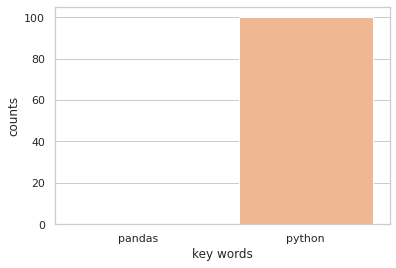

In [10]:
import os
from dotenv import load_dotenv
import tweepy
import requests
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

load_dotenv()

consumer_key = os.environ.get('CONSUMER_KEY')
consumer_secret = os.environ.get('CONSUMER_SECRET')
access_token = os.environ.get('ACCESS_TOKEN')
access_token_secret = os.environ.get('ACCESS_TOKEN_SECRET')
bearer_token = os.environ.get('BEARER_TOKEN')

client = tweepy.Client(bearer_token=bearer_token,
consumer_key=consumer_key,
consumer_secret=consumer_secret,
access_token=access_token,
access_token_secret=access_token_secret,
return_type = requests.Response,
wait_on_rate_limit=True)

query = '#100daysofcode (pandas OR python) -is:retweet'
tweets = client.search_recent_tweets(query,tweet_fields = ['lang','author_id','created_at'],max_results=100)

tweets_dict = tweets.json()
tweets_data = tweets_dict.get('data')
df_tweets = pd.DataFrame.from_dict(tweets_data)

def word_in_text(word,tweet_text):
    word = word.lower()
    tweet_text = tweet_text.lower()

    return (word in tweet_text)


counts_pandas = 0
counts_python = 0

for i in range(len(df_tweets)):
    pandas = word_in_text('pandas', df_tweets.iloc[i]['text'])
    python = word_in_text('python', df_tweets.iloc[i]['text'])
    if pandas:
        counts_pandas += 1
    if python:
        counts_python += 1

sns.set_theme(style='whitegrid',palette='pastel')
cd = ['pandas','python']
plot = sns.barplot(cd,[counts_pandas,counts_python])
plot.set(xlabel = 'key words', ylabel = 'counts')
